# Linear Gaussian

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pytest
import sbi.simulators as simulators
import sbi.utils as utils
import torch
from sbi.inference.snpe.snpe_c import APT
from torch import distributions

# use cpu by default
torch.set_default_tensor_type("torch.FloatTensor")

# seed the simulations
torch.manual_seed(0)

In [3]:
dim, std = 3, 1.0
simulator = simulators.LinearGaussianSimulator(dim=dim, std=std)
prior = distributions.MultivariateNormal(
    loc=torch.zeros(dim), covariance_matrix=torch.eye(dim)
)

In [6]:
true_observation = torch.zeros(dim)

apt = APT(
    simulator=simulator,
    true_observation=true_observation,
    prior=prior,
    num_atoms=-1,
    density_estimator='maf',
    calibration_kernel=None,
    z_score_obs=True,
    use_combined_loss=False,
    train_with_mcmc=False,
    mcmc_method="slice-np",
    summary_net=None,
    retrain_from_scratch_each_round=False,
    discard_prior_samples=False,
)

In [5]:
# run inference
num_rounds, num_simulations_per_round = 2, 500
apt.run_inference(
    num_rounds=num_rounds, num_simulations_per_round=num_simulations_per_round
)

# draw samples from posterior
samples = apt.sample(1000)

  0%|          | 0/1 [00:00<?, ?it/s]/Users/deismic/anaconda3/envs/sbi/lib/python3.8/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch


100%|██████████| 1/1 [00:13<00:00, 13.43s/it]


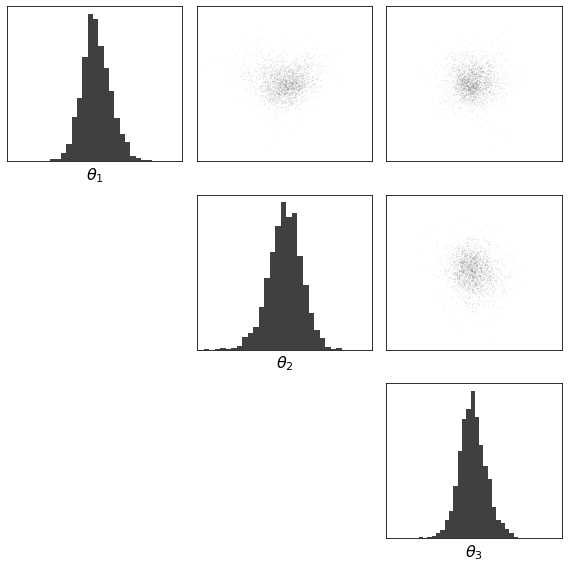

In [43]:
samples = apt.sample(2500)
samples = utils.tensor2numpy(samples)
figure = utils.plot_hist_marginals(
    data=samples,
    lims=[-4, 4],
)

In [44]:
log_prob = apt.evaluate(torch.tensor([0.0, 0.0, 0.0]))
print('log probability of origin: ', log_prob)

log probability of origin:  tensor([-1.4048])


# SNPE-B

In [29]:
from sbi.inference.snpe.snpe_b import SNPE_B

In [30]:
true_observation = torch.zeros(dim)

snpe_b = SNPE_B(
    simulator=simulator,
    true_observation=true_observation,
    prior=prior,
    density_estimator='maf',
    calibration_kernel=None,
    z_score_obs=True,
    use_combined_loss=False,
    train_with_mcmc=False,
    mcmc_method="slice-np",
    summary_net=None,
    retrain_from_scratch_each_round=False,
    discard_prior_samples=False,
)

In [31]:
# run inference
num_rounds, num_simulations_per_round = 2, 500
snpe_b.run_inference(
    num_rounds=num_rounds, num_simulations_per_round=num_simulations_per_round
)



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch




 50%|█████     | 1/2 [00:08<00:08,  8.71s/it]

-------------------------
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 60
Best validation performance: -3.7013

:  50%|█████     | 1/2 [00:08<00:08,  8.71s/it]

new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch




-------------------------
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 60
Best validation performance: -3.7013

-------------------------0:23<00:00, 10.53s/it]
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 60
Best validation performance: -3.7013

: 100%|██████████| 2/2 [00:23<00:00, 11.74s/it]


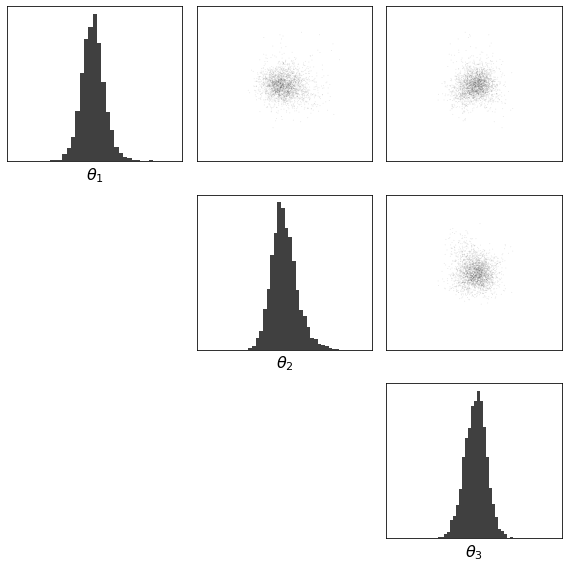

In [32]:
samples = snpe_b.sample(2500)
samples = utils.tensor2numpy(samples)
figure = utils.plot_hist_marginals(
    data=samples,
    lims=[-4, 4],
)

# SNPE-A